In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import re
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

Here is the link of a dataset : https://sourceforge.net/projects/flavia/files/Leaf%20Image%20Dataset/1.0/Leaves.tar.bz2/download

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/Drive', force_remount= True)

Mounted at /content/Drive


In [ ]:
# path to the dataset
data_dir = '/content/Drive/MyDrive/Leaves'

# Data Preprocessing

In [ ]:

# predefined image dimensions
image_width, image_height = 64, 64

# leaves list
leaves = [(1001, 1059), (1060, 1122), (1552, 1616), (1123, 1194), (1195, 1267),
          (1268, 1323), (1324, 1385), (1386, 1437), (1497, 1551), (1438, 1496),
          (2001, 2050), (2051, 2113), (2114, 2165), (2166, 2230), (2231, 2290),
          (2291, 2346), (2347, 2423), (2424, 2485), (2486, 2546), (2547, 2612),
          (2616, 2675), (3001, 3055), (3056, 3110), (3111, 3175), (3176, 3229),
          (3230, 3281), (3282, 3334), (3335, 3389), (3390, 3446), (3447, 3510),
          (3511, 3563), (3566, 3621)]

# function to assign labels
def assign_label(filename, leaves):
    # extract the number from the filename
    number = int(re.findall(r'\d+', filename)[0])

    # assign the label according to the ranges
    for i, (start, end) in enumerate(leaves):
        if start <= number <= end:
            return i + 1  # labels start from 1

    print(f"Could not assign label to image {filename}")
    return None

images = []
labels = []

for image_name in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image_name)

    # assign label to the image based on its filename
    label = assign_label(image_name, leaves)
    if label is None:
        continue

    # open the image, resize it and convert it to grayscale
    image = Image.open(image_path).convert('L')  # convert to grayscale
    image = image.resize((image_width, image_height))  # resize the image

    # append the image and its labels to the respective lists
    images.append(np.array(image))
    labels.append(label)


# convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to be between 0 and 1
images = images /255.0

# Split the data into train, validation and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

#### This is the preprocessed images that gets split and pass to model


In [ ]:
print(images)

[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         0.9372549  0.97254902 ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]
  [0.99215686 0.992156

# Build the CNN Model

In [ ]:
# create a sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32,(3,3), activation='relu', input_shape = (64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25)) #dropout layer after first max pooling

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25)) #dropout layer after second max pooling

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) #dropout layer before output layer

model.add(Dense(33, activation='softmax')) # 32 classes in the Flavia dataset

#Training the Model

In [ ]:
# reshape data to include channel dimension (in this case, 1 channel)
train_images = train_images.reshape(-1, 64, 64, 1)
val_images = val_images.reshape(-1, 64, 64, 1)
test_images = test_images.reshape(-1, 64, 64, 1)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))


Epoch 1/5
36/36 [==============================] - 10s 216ms/step - loss: 3.5257 - accuracy: 0.0332 - val_loss: 3.4718 - val_accuracy: 0.1204
Epoch 2/5
36/36 [==============================] - 9s 256ms/step - loss: 3.3624 - accuracy: 0.1059 - val_loss: 3.0417 - val_accuracy: 0.2068
Epoch 3/5
36/36 [==============================] - 7s 196ms/step - loss: 2.6422 - accuracy: 0.2668 - val_loss: 2.0965 - val_accuracy: 0.5052
Epoch 4/5
36/36 [==============================] - 9s 259ms/step - loss: 2.0699 - accuracy: 0.4121 - val_loss: 1.6139 - val_accuracy: 0.5628
Epoch 5/5
36/36 [==============================] - 11s 307ms/step - loss: 1.6659 - accuracy: 0.5109 - val_loss: 1.3546 - val_accuracy: 0.6754


#Evaluating the Model

12/12 [==============================] - 1s 43ms/step
Accuracy:  0.7015706806282722
Precision:  0.7326383691719869
Recall:  0.7015706806282722
F1-Score:  0.688879940545907


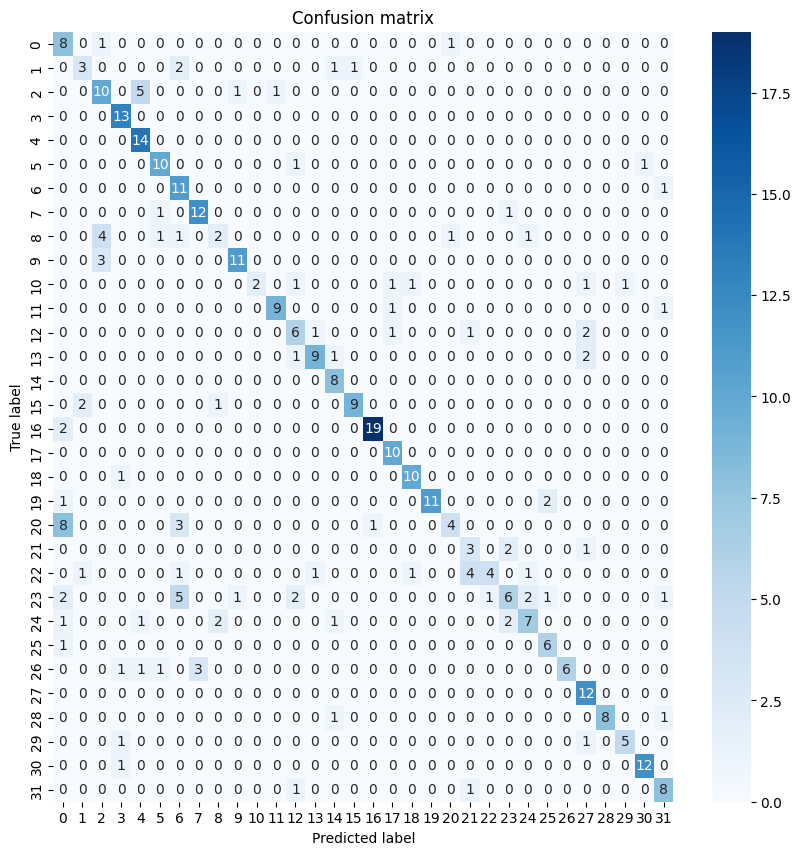

In [ ]:

# Use the model to predict the test set
test_predictions = model.predict(test_images)

# For multiclass classification, select the class with highest probability as prediction
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate Accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy: ", accuracy)

# Calculate Precision
precision = precision_score(test_labels, test_predictions, average='weighted')
print("Precision: ", precision)

# Calculate Recall
recall = recall_score(test_labels, test_predictions, average='weighted')
print("Recall: ", recall)

# Calculate F1-Score
f1 = f1_score(test_labels, test_predictions, average='weighted')
print("F1-Score: ", f1)

# Generate confusion matrix
matrix = confusion_matrix(test_labels, test_predictions)

# Plot the matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
